iteration 1
iteration 1
candidate of index 1 is : 484.87694593402693
iteration 1
candidate of index 2 is : 575.353266762715
iteration 1
candidate of index 3 is : 642.5343102323437
iteration 1
candidate of index 4 is : 473.06686904061496
iteration 1
candidate of index 5 is : 504.1919960497008
iteration 1
candidate of index 6 is : 580.503018766937
iteration 1
candidate of index 7 is : 495.4223148074795
iteration 1
candidate of index 8 is : 508.27472726466544
iteration 1
candidate of index 9 is : 564.9269773609504
iteration 1
candidate of index 10 is : 534.9836419747398
iteration 1
candidate of index 11 is : 485.2373069260993
iteration 1
candidate of index 12 is : 576.2090488362156
iteration 1
candidate of index 13 is : 481.1616582319807
iteration 1
candidate of index 14 is : 621.8612182612998
iteration 1
candidate of index 15 is : 573.5649588081388
iteration 1
candidate of index 16 is : 471.7807406635902
iteration 1
candidate of index 17 is : 509.5343722919318
iteration 1
candidate of in

┌ Warning: clustering solution contains 3 < 4 clusters.
└ @ Main In[4]:73


1
candidate of index 42 is : 617.5318492186657
iteration 1
candidate of index 43 is : 520.0079419455508
iteration 1
candidate of index 44 is : 509.7953153686766
iteration 1
candidate of index 45 is : 565.1510629758718
iteration 1
candidate of index 46 is : 537.0219908784602
iteration 1
candidate of index 47 is : 546.1422784627557
iteration 1
candidate of index 48 is : 529.3808406050987
iteration 1
candidate of index 49 is : 524.304194350068
mean of cluster 4 for murder = 5.39
mean of cluster 2 for murder = 12.33
mean of cluster 3 for murder = 3.09
mean of cluster 1 for murder = 7.61
mean of cluster 4 for assault = 145.75
mean of cluster 2 for assault = 259.32
mean of cluster 3 for assault = 76.0
mean of cluster 1 for assault = 135.71
mean of cluster 4 for urbanpop = 77.17
mean of cluster 2 for urbanpop = 68.32
mean of cluster 3 for urbanpop = 52.08
mean of cluster 1 for urbanpop = 61.14
mean of cluster 4 for rape = 19.88
mean of cluster 2 for rape = 29.22
mean of cluster 3 for rape = 1

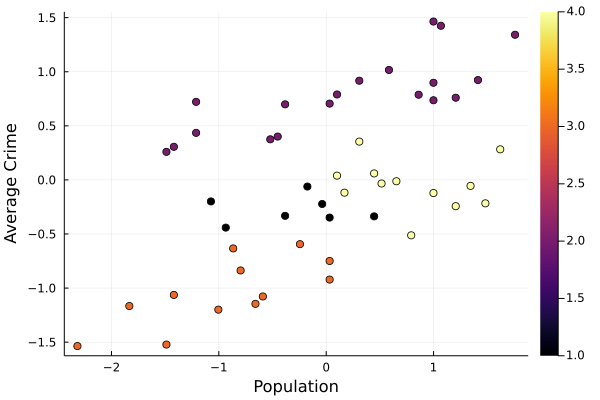

In [4]:
using DataFrames, CSV
using StatsBase, Statistics
using LinearAlgebra

US = CSV.read("USArrests.csv", DataFrame)
# murder per 100K
# asssult per 100K
# percent urban population
# rape per 100K

USm = Matrix(US[:,2:5]) # scaling requires a matrix

USsc = standardize(ZScoreTransform, USm, dims=1)
# scale each attribute to have mean 0 and std dev 1

# a function to compute the sqaured euclidean distance between
# two vectors x and y.
function distance(x, y)
    # to be completed
    norm(x - y)^2
end

# a function to compute the centroid of a cluster.
# X is a matrix that contains the cluster,
# with rows as observations and (numeric) columns as attributes.
function centroid(X)
    # to be completed
    m = size(X)[1]
    vec(sum(X, dims=1))/m
end

# a single iteration of kmeans
function kmeans1(X, k)
    (m,n) = size(X)
    if k > m
        error("number of clusters ", k, " > number of observations ", m)
    end

    clusters0 = rand(1:k, m)  # random initial assignment
    clusters = zeros(Int8, m) # will hold the cluster assignments
    
    ii = 0
    while true
        # compute the cluster centroids
        c = zeros(k, n)
        for i in 1:k
            c[i,:] = centroid( X[ findall(x->x==i, clusters0), : ] )
        end

        # assign each observation to the nearest centroid
        for i in 1:m
            clusters[i] = 1  # initially assign observation to cluster 1
            best = distance(X[i,:], c[1,:])
            for j in 2:k
                candidate = distance(X[i,:], c[j,:])
                if candidate < best  # assign to cluster j if closer
                    best = candidate
                    clusters[i] = j
                end
            end
        end
        if clusters == clusters0
            break
        end
        clusters0 = clusters
        ii += 1
        if ii % 1 == 0
            println("iteration ", ii)
        end
    end
    ncl = length(countmap(clusters))
    if ncl != k
        @warn "clustering solution contains "*string(ncl)*" < "*string(k)*" clusters."
    end
    return clusters
end

# a function compute the value of the kmeans objective
# function, the sum of the within-cluster distances.
# X is the matrix of observations.
# k is the number of clusters.
# cl is the clustering solution.
function objective(X, k, cl)
    # to be completed
    obj = countmap(cl)
    mu = 0
    objective = 0
    for j in keys(obj)
        mu = centroid(X[findall(x->x==j, cl), : ]) 
        for x in vec(X[findall(x->x==j, cl), : ])
                objective += sum((x .- mu).^2)
        end
    end
    return objective
end

# driver function for kmeans.
# X is the (scaled) matrix of observations.
# k is the number of clusters.
# niter is the number of times to run the k-means algorithm.
# the best of the niter candidate solutions is returned.
function kmeans(X, k; niter=50)
    # to be completed
    cl = kmeans1(X,k)
    sol = cl
    best = objective(X,k,cl)
    
    for i in 1:(niter-1)
        cl = kmeans1(X,k)
        candidate = objective(X,k,cl)
        println("candidate of index ", i, " is : ", candidate)
        if candidate < best
            best = candidate
            sol = cl
        end
    end
    return sol
end

cl = kmeans(USsc, 4);    # call kmeans driver function
objective(USsc, 4, cl)   # the objective function of the best solution found
cldict = countmap(cl)    # use countmap() to see the number of obs in each cluster

# obtain information from the clustering to solution to provide
# a qualitative description of each of the four clusters of states.
vars = ["murder", "assault", "urbanpop", "rape"]

for j in 1:4
    for i in keys(cldict)
        c = centroid(USm[findall(x->x==i, cl), : ])
        println("mean of cluster ", i, " for ", vars[j], " = ", round(c[j], digits=2))
    end
end

using Plots

(m,n) = size(USsc)
avgcrime = zeros(m)
for i in 1:m
    avgcrime[i] = sum(USsc[i, [1,2,3,4]])/4
end

scatter(USsc[:,3], avgcrime, zcolor=cl, lab="", xlabel = "Population", ylabel = "Average Crime")

A qualitative description of each of the constructed clusters:

    For the purple cluster, we can see that the cluster is for values that have a larger average crime but varies for population. 
    
    For the black cluster, it has a more median average crime and median population clustering
    
    For the yellow cluster, the average crime is is also in the middle, but the population is large
    
    And finally, for the orange cluster, a smaller average crime rate but varies for population size.